<a href="https://colab.research.google.com/github/afraidspy/CienciaDatos/blob/main/Reto_Explorando_el_%C3%ADndice_de_felicidad_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto: Explorando el índice de felicidad

  Jessica Santizo Galicia


  El Informe Mundial sobre la Felicidad es una encuesta que clasifica a 156 países por sus niveles de bienestar, tomando en cuenta 6 factores:
  1.	Producción económica
  2.	Apoyo social
  3.	Esperanza de vida
  4.	Libertad
  5.	Generosidad
  6.	Ausencia de corrupción
  El primer informe se publicó en 2012 y continúa ganando reconocimiento mundial a medida que los gobiernos, las organizaciones y la sociedad civil utilizan cada vez más indicadores de felicidad para informar sus decisiones de formulación de políticas.
  En este sentido, se tomará el estudio del 2019 para explorar los datos por país o región y obtener gráficas relevantes. El archivo incluye el puntaje (score) en una escala donde la mejor vida posible está representada con 10 y la peor con 0. Las siguientes columnas representan la medida en que los seis factores contribuyen a evaluar la felicidad en cada país.


In [118]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.

In [119]:
#Leer archivo desde ruta de Drive
import pandas as pd

path_hapiness = "/content/drive/MyDrive/LearningGate/Visualización de datos con Python/Happiness_report.csv"
df_happiness = pd.read_csv(path_hapiness)



In [120]:
#Exploring happines
df_happiness.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


3. A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [121]:
df_mex = df_happiness[df_happiness['Country or region'] == 'Mexico']
#inplace = True, indica que se hacen los cambios en el dataframe de hapineess sin crear otro df
df_mex.set_index("Country or region", inplace=True)
#Explorar que regresa df_mex
df_mex.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4. Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

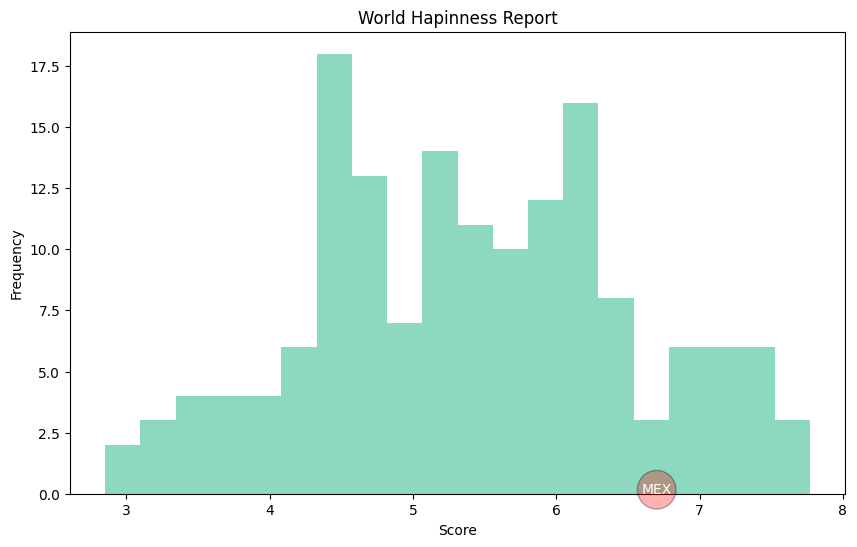

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

df_mx = df_happiness[df_happiness['Country or region'] == 'Mexico']
df_mx.set_index("Country or region", inplace=True)

score_mexico = df_mx['Score'].values[0]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_happiness,
             x='Score',
             bins=20,
             color='#66CDAA',
             edgecolor='none'   )

props_bbox = {'boxstyle': 'circle',
              'facecolor': 'red',
              'alpha': 0.3}
plt.text(score_mexico,0, 'MEX', color='white', bbox=props_bbox)

plt.title('World Hapinness Report')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

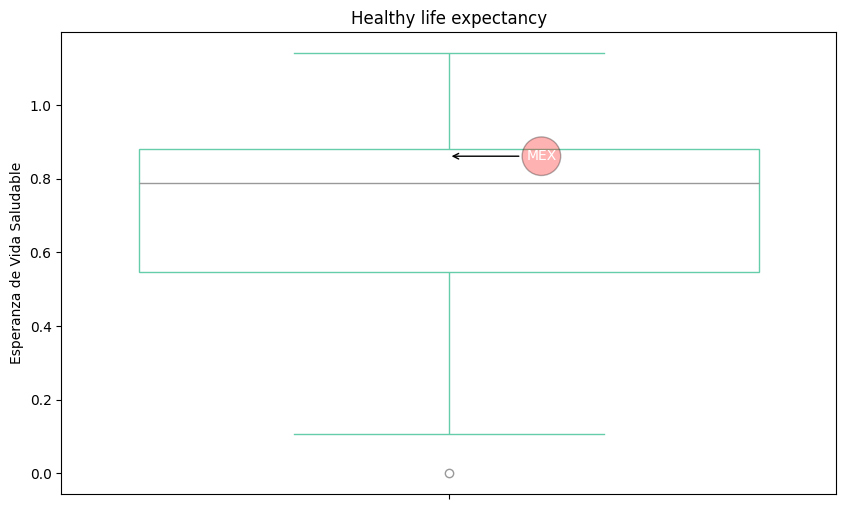

In [123]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_happiness,
            y='Healthy life expectancy',
            color='white',
            whiskerprops={'color': '#66CDAA'},
            boxprops={'edgecolor': '#66CDAA'},
            capprops={'color': '#66CDAA'})

healthy_life_mexico = df_mex.loc['Mexico', 'Healthy life expectancy']

props_bbox = {'boxstyle': 'circle',
              'facecolor': 'red',
              'alpha': 0.3}

plt.annotate('MEX',
             color = 'white',
             xy=(0, healthy_life_mexico),
             xytext=(0.1, healthy_life_mexico),
             bbox=props_bbox,
             arrowprops=dict(arrowstyle='->'),
             horizontalalignment='left',
             verticalalignment='center')

plt.title('Healthy life expectancy')
plt.ylabel('Esperanza de Vida Saludable')
plt.show()


6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe mexico, obtenido anteriormente.

                              Factors
GDP per capita                  1.070
Social support                  1.323
Healthy life expectancy         0.861
Freedom to make life choices    0.433
Generosity                      0.074
Perceptions of corruption       0.073


<Figure size 700x600 with 0 Axes>

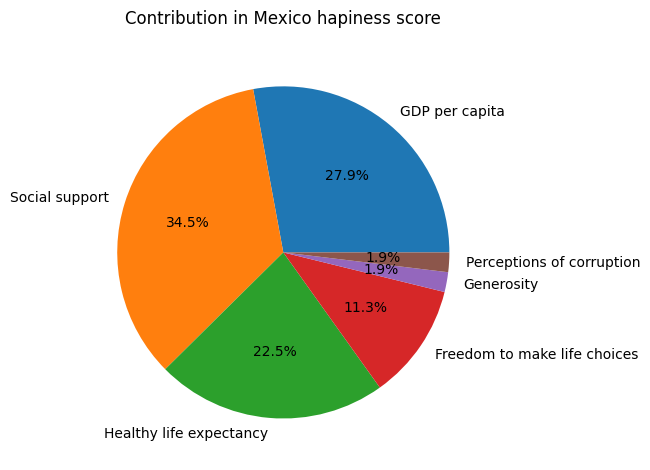

In [124]:

factors = ['GDP per capita',
           'Social support',
           'Healthy life expectancy',
           'Freedom to make life choices',
           'Generosity',
           'Perceptions of corruption']

mex_factors = df_mex[factors].T
mex_factors.columns = ['Factors']

mex_factors = df_happiness.loc[df_happiness['Country or region']=='Mexico', factors].squeeze().to_frame('Factors')
print(pd.DataFrame(mex_factors))


plt.figure(figsize=(7,6))


ax = mex_factors.plot.pie(
    y       = 'Factors',
    autopct = '%1.1f%%',
    labels  = mex_factors.index,
    legend  = False
)

ax.set_ylabel('')
ax.set_title('Contribution in Mexico hapiness score', pad=15)
plt.tight_layout()
plt.show()


7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

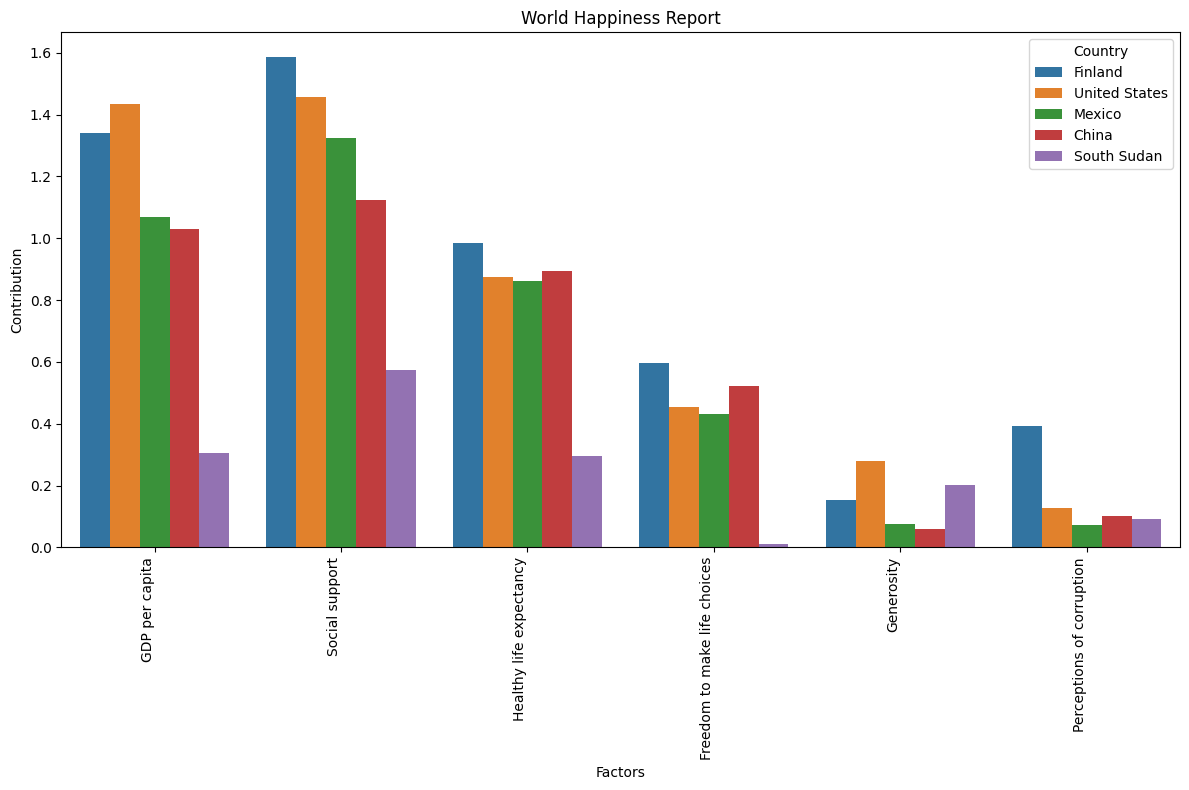

In [125]:
df_sorted   = df_happiness.sort_values('Score', ascending=False)

most_happy  = df_sorted.iloc[0]['Country or region']
least_happy = df_sorted.iloc[-1]['Country or region']

selected_countries = [most_happy, least_happy, 'Mexico', 'United States', 'China']
df_filtered = df_happiness[df_happiness['Country or region'].isin(selected_countries)]

df_melted = df_filtered.melt(id_vars=['Country or region'],
                             value_vars=factors,
                             var_name='Factor',
                             value_name='Contribution')

plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted,
            x='Factor',
            y='Contribution',
            hue='Country or region')

plt.title('World Happiness Report')
plt.xlabel('Factors')
plt.ylabel('Contribution')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

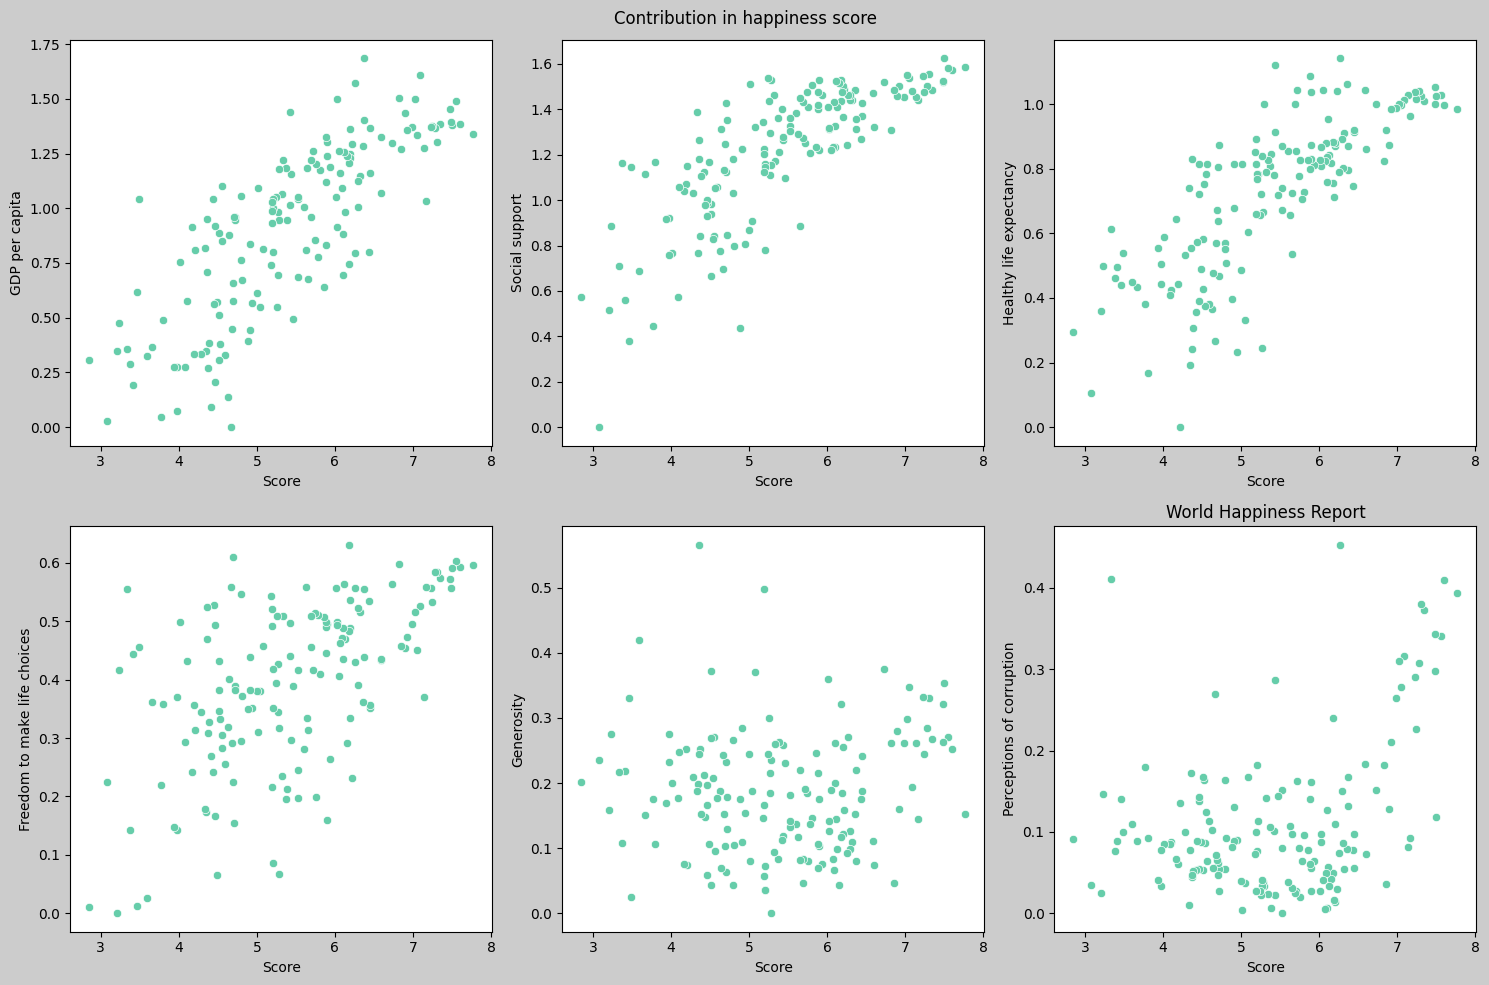

In [126]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
fig.patch.set_facecolor('#ccc')

for i, factor in enumerate(factors):
    sns.scatterplot(data=df_happiness,
                    x='Score' ,
                    y=factor,
                    ax=axes[i],
                    color='#66CDAA')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel(factor)


fig.suptitle('Contribution in happiness score')
plt.title('World Happiness Report')
plt.tight_layout()
plt.show()

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

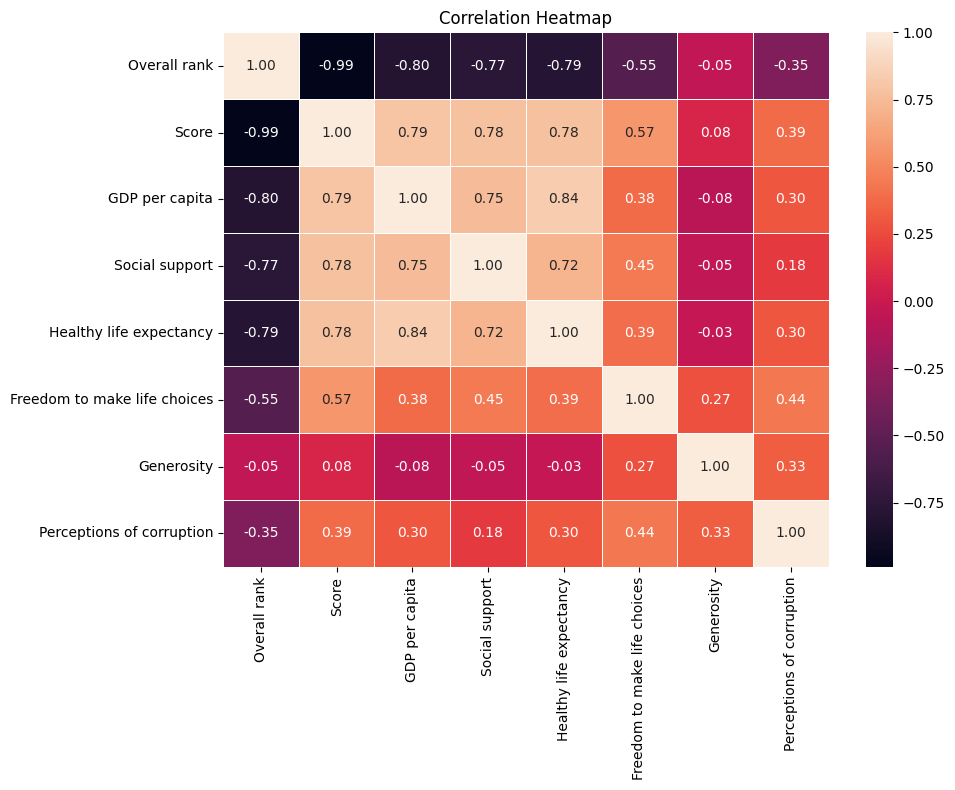

In [127]:
correlation_cols = ['Overall rank', 'Score'] + factors
correlation_matrix = df_happiness[correlation_cols].corr()

plt.figure(figsize=(10, 8))
ax= sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            linewidths=.5)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

In [128]:
path_metadata = "/content/drive/MyDrive/LearningGate/Visualización de datos con Python/Metadata.csv"
df_metadata = pd.read_csv(path_metadata)
df_metadata

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra
...,...,...,...,...,...
258,XKX,Europe & Central Asia,Upper middle income,NaN,Kosovo
259,YEM,Middle East & North Africa,Low income,NaN,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,South Africa
261,ZMB,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,Zambia


<ipython-input-129-1692534>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_happiness_by_region,


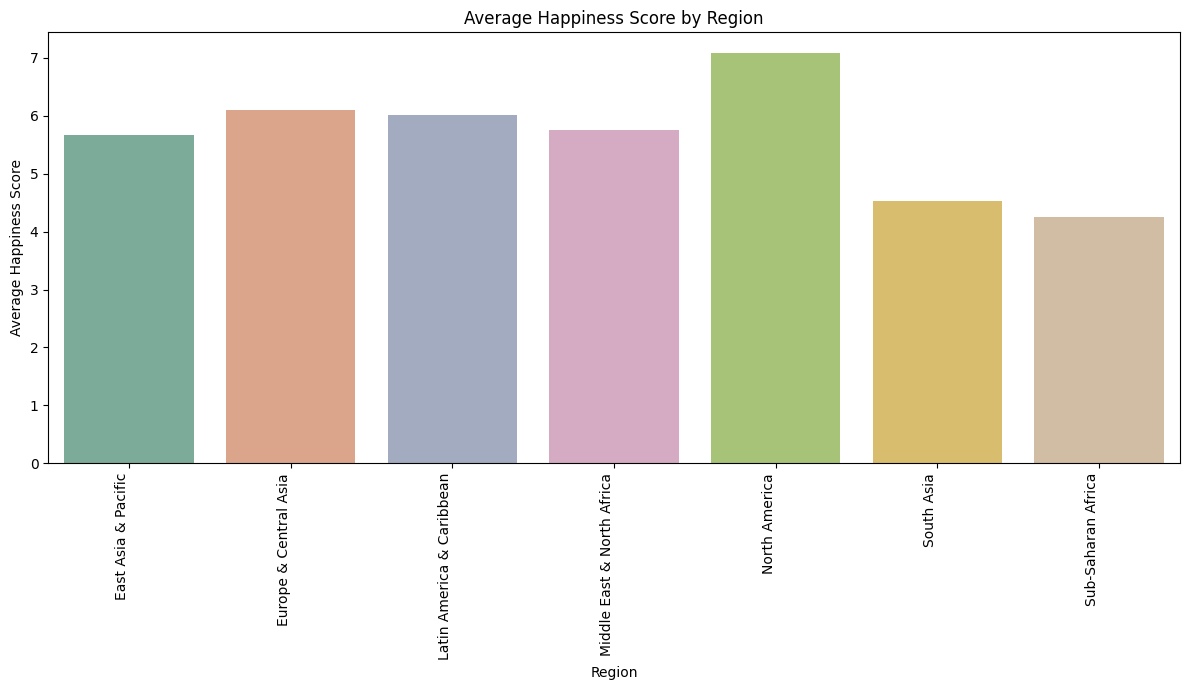

In [129]:
df_combined = pd.merge(df_happiness,
                       df_metadata[['TableName', 'Region']],
                       left_on='Country or region',
                       right_on='TableName',
                       how='left')

df_combined = df_combined.drop('TableName', axis=1)

average_happiness_by_region = df_combined.groupby('Region')['Score'].mean().reset_index()

custom_palette = [
    '#74b49b',   # verde fuerte
    '#e9a07d',   # salmón
    '#9da9c4',   # azul
    '#dba4c4',   # rosa
    '#a9cf6b',   # verde agua
    '#e9c65d',   # amarillo
    '#d9bd9c'    # beige
]

plt.figure(figsize=(12, 7))
sns.barplot(data=average_happiness_by_region,
            x='Region',
            y='Score',
            palette = custom_palette)

plt.title('Average Happiness Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()